**PROYECTO 2 DESARROLLO**

In [5]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Librerias
import numpy as np
# Manipulación del dataframe
import pandas as pd
# exploración de datos
import matplotlib.pyplot as plt
#exploración de datos
import seaborn as sns
# Mejorar el estilo de los gráficos
sns.set()
# fechas
import datetime #Para manipular fechas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import xgboost as xgb
import scipy as sp


**Comentarios**

**EL USA DEL SIGMA COMO ELIMINADOR DE OUTLIDERS** Se decidó utilizar el metodo sigma para acotar y eliminar las varibles atípicas de los atributos como ejercicio, sabiendo que en el anterior proyecto se acoto información y se eliminaron outliders según el conocimiento del dataset y lo mínimo para tener un modelo relativamente mejor. Usando esta técnica, no se deja al azar ni a criterio subjetivos la eliminación de outliders por lo cual, se hace una valoración objetiva y se deja al modelo que generalice más, atendiendo a los "valores atípicos" que quedan.

**Se decidió "encodar" tipos de propiedad y ciudad** para agregarle más información al modelo y mirar si al agregar más atributos mejora la predicción del modelo con respecto a los modelos del proyecto 1. Tipo de propiedad se dejo como One-Hot Encoding y Ciudad como Label encoding

In [6]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#cargando datos
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head(5) #Mostrando primeras 5 instancias

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
print(data.shape) #Tamaño del data frame
print(data.columns)
data.describe()

(146660, 19)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [8]:
data.info() #Información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [9]:
data = data.drop(['title','description','currency','operation_type','start_date','end_date','created_on','l1','operation_type'], axis = 1) #,'lon','lat' 

In [10]:
data = data.rename(columns={ 'l2':'provincia','l3':'ciudad',
                            'rooms':'ambientes', 'bedrooms': 'dormitorios','bathrooms':'baños', 
                            'surface_total':'superficie_total','surface_covered':'superficie_construida',
                            'property_type':'tipo_de_propiedad'})

In [11]:
# Filtrado explicado:
#Se realiza el filtrado utilizando una mascara para las propiedades ubicadas en Capital Federal
mascara = data['provincia'].values == 'Capital Federal'

#Se crea un nuevo dataset seleccionando las filas con el método Loc()
new_data = data.loc[mascara] 

# Se crea una lista con las categóticas de tipos de propiedad que interesa seleccionar
tofp =['Departamento','Casa','PH'] 


dataA = new_data[new_data.tipo_de_propiedad.isin(tofp)]
dataA.shape



(91485, 11)

In [15]:
#solo las superficies positivas
dataA['Superficie_Positiva'] = dataA['superficie_total'] - dataA['superficie_construida']
dataA.head()

<ipython-input-15-5d50b4989280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA['Superficie_Positiva'] = dataA['superficie_total'] - dataA['superficie_construida']


,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,0.0
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0


In [16]:
#Filtrando solo para superficies positivas
dataB = dataA[dataA["Superficie_Positiva"] >= 0]
dataB.head()

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,0.0
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0


In [17]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81291 entries, 0 to 146558
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lat                    77040 non-null  float64
 1   lon                    77040 non-null  float64
 2   provincia              81291 non-null  object 
 3   ciudad                 81291 non-null  object 
 4   ambientes              81291 non-null  float64
 5   dormitorios            81291 non-null  float64
 6   baños                  80458 non-null  float64
 7   superficie_total       81291 non-null  float64
 8   superficie_construida  81291 non-null  float64
 9   price                  81291 non-null  float64
 10  tipo_de_propiedad      81291 non-null  object 
 11  Superficie_Positiva    81291 non-null  float64
dtypes: float64(9), object(3)
memory usage: 8.1+ MB


In [18]:
dataB.describe()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Superficie_Positiva
count,77040.000000,77040.000000,81291.000000,81291.000000,80458.000000,81291.000000,81291.000000,8.129100e+04,81291.000000
mean,-34.598354,-58.434841,3.004957,1.998745,1.554600,112.920348,92.261271,2.657606e+05,20.659077
std,0.023408,0.035766,1.299796,1.045831,0.853083,988.263003,769.777375,3.337463e+05,613.718823
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03,0.000000
25%,-34.612168,-58.457280,2.000000,1.000000,1.000000,49.500000,44.000000,1.250000e+05,0.000000
50%,-34.598669,-58.432771,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05,5.000000
75%,-34.584161,-58.409599,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05,11.000000
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07,125936.000000


In [19]:
dataB.shape

(81291, 12)

## 1. Detección y eliminación de Outliders

In [20]:
dataA1 = dataB.copy()

In [21]:
dataA1.head()

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,0.0
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0


Valores atípicos PRECIO

In [22]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA1.price.mean()
std = dataA1.price.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_precio = np.logical_or(dataA1.price < minimo, dataA1.price > maximo)

In [23]:
dataA11= dataA1.loc[(dataA1.price > minimo) & (dataA1.price < maximo)]

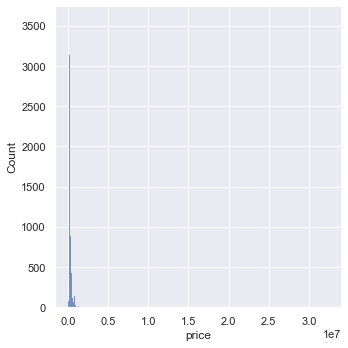

In [29]:
sns.displot(dataA1.price)#, bins = 50, rug = True)

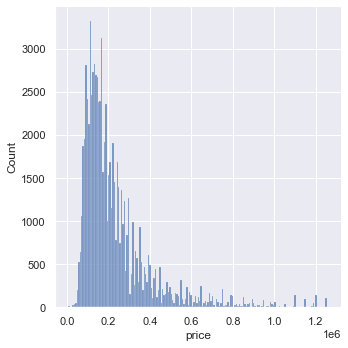

In [30]:
sns.displot(dataA11.price)#, bins = 50, rug = True)

In [31]:
dataA11.price.describe()

count    7.980800e+04
mean     2.332734e+05
std      1.786064e+05
min      6.000000e+03
25%      1.249000e+05
50%      1.770000e+05
75%      2.730000e+05
max      1.260000e+06
Name: price, dtype: float64

In [32]:
dataA1.price.describe()

count    8.129100e+04
mean     2.657606e+05
std      3.337463e+05
min      6.000000e+03
25%      1.250000e+05
50%      1.800000e+05
75%      2.800000e+05
max      3.243423e+07
Name: price, dtype: float64

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


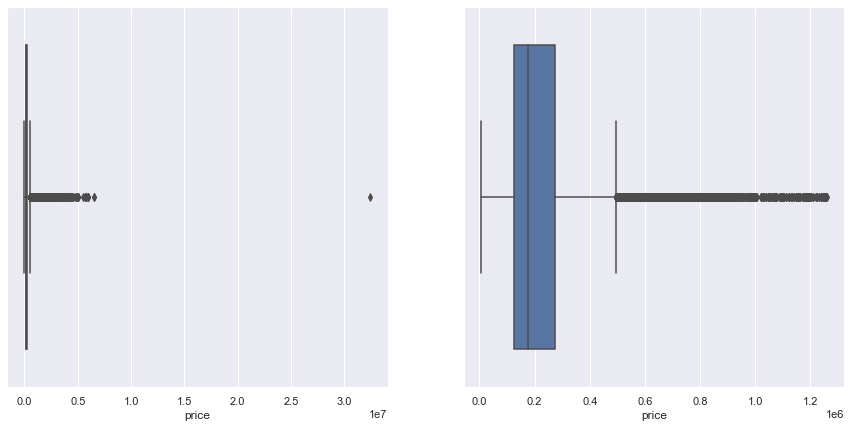

In [33]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA1.price)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA11.price)

plt.show()

Valores atípicos Superficie Constrida

In [34]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA11.superficie_construida.mean()
std = dataA11.superficie_construida.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_SC = np.logical_or(dataA11.superficie_construida < minimo, dataA11.superficie_construida > maximo)

In [35]:
dataA12= dataA11.loc[(dataA11.superficie_construida > minimo) & (dataA11.superficie_construida < maximo)]

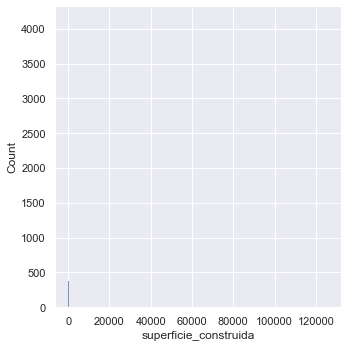

In [36]:
sns.displot(dataA11.superficie_construida)#, bins = 50, rug = True)

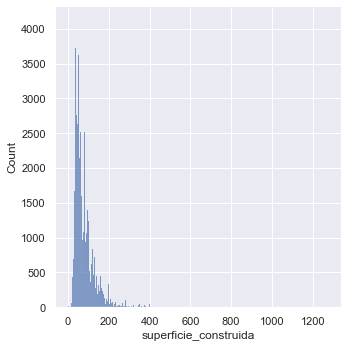

In [37]:
sns.displot(dataA12.superficie_construida)#, bins = 50, rug = True)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


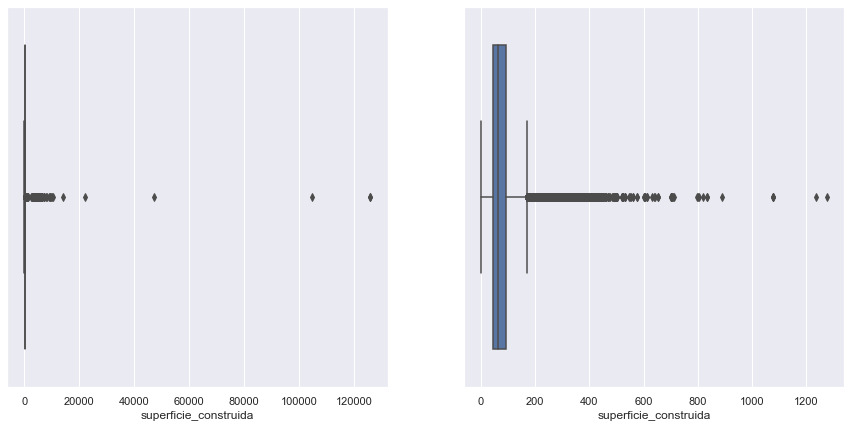

In [38]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA11.superficie_construida)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA12.superficie_construida)

plt.show()

Valores Atípicos Superficie Total

In [39]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA12.superficie_total.mean()
std = dataA12.superficie_total.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_ST = np.logical_or(dataA12.superficie_total < minimo, dataA12.superficie_total > maximo)

In [40]:
dataA13= dataA12.loc[(dataA12.superficie_total > minimo) & (dataA12.superficie_total < maximo)]

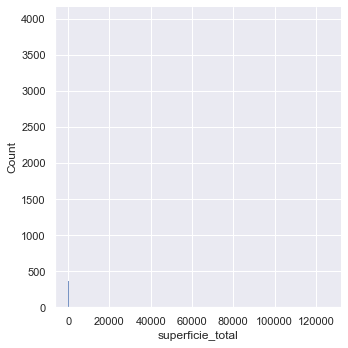

In [41]:
sns.displot(dataA12.superficie_total)#, bins = 50, rug = True)

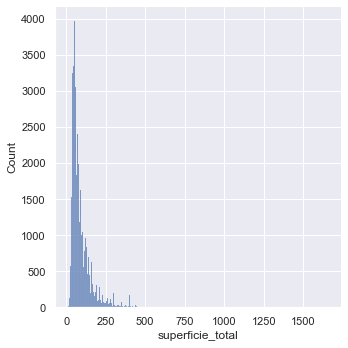

In [42]:
sns.displot(dataA13.superficie_total)#, bins = 50, rug = True)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


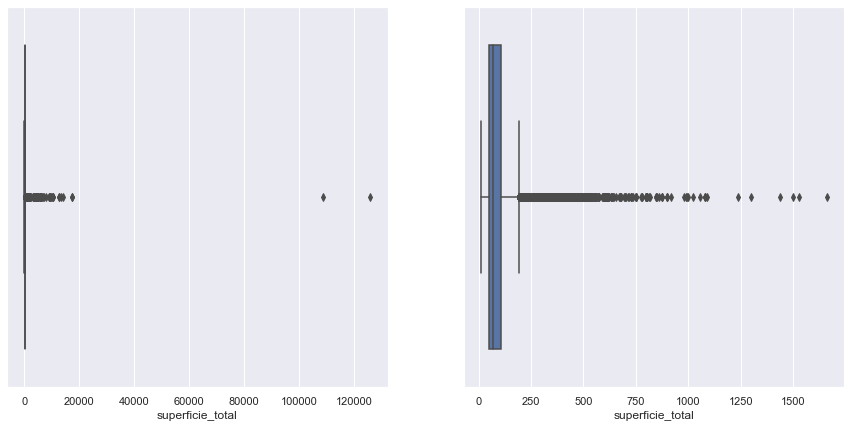

In [43]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA12.superficie_total)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA13.superficie_total)

plt.show()

Valores atípicos Baños

In [44]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA13.baños.mean()
std = dataA13.baños.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_baños = np.logical_or(dataA13.baños < minimo, dataA13.baños > maximo)

In [45]:
dataA14= dataA13.loc[(dataA12.baños > minimo) & (dataA13.baños < maximo)]

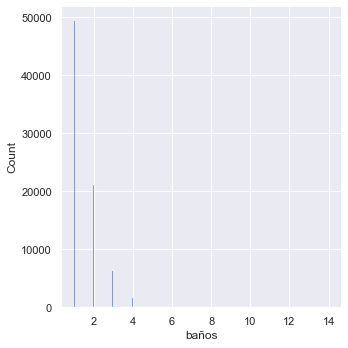

In [46]:
sns.displot(dataA13.baños)#, bins = 50, rug = True)

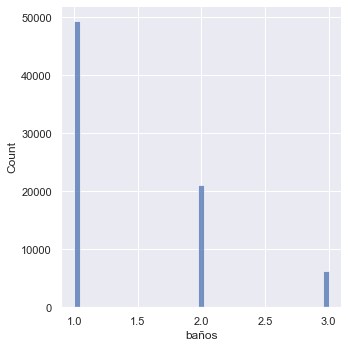

In [47]:
sns.displot(dataA14.baños)#, bins = 50, rug = True)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


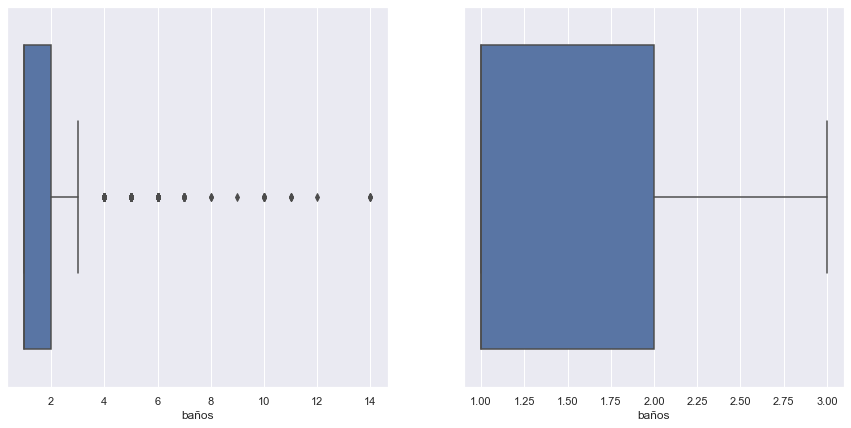

In [48]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA13.baños)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA14.baños)

plt.show()

Los valores atípicos de los baños, no sé si borrarlos.

Valores atípicos Dormitorios

In [49]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA14.dormitorios.mean()
std = dataA14.dormitorios.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_dormi = np.logical_or(dataA14.dormitorios < minimo, dataA14.dormitorios > maximo)

In [50]:
dataA15= dataA14.loc[(dataA14.dormitorios > minimo) & (dataA14.dormitorios < maximo)]

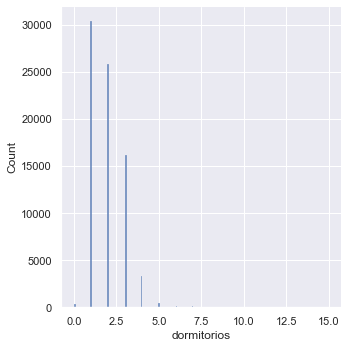

In [51]:
sns.displot(dataA14.dormitorios)#, bins = 50, rug = True)

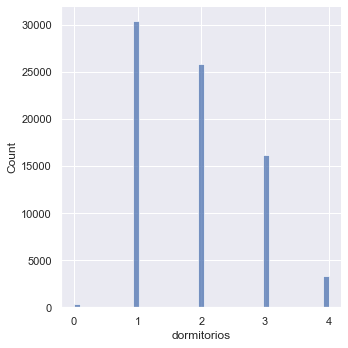

In [52]:
sns.displot(dataA15.dormitorios)#, bins = 50, rug = True)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


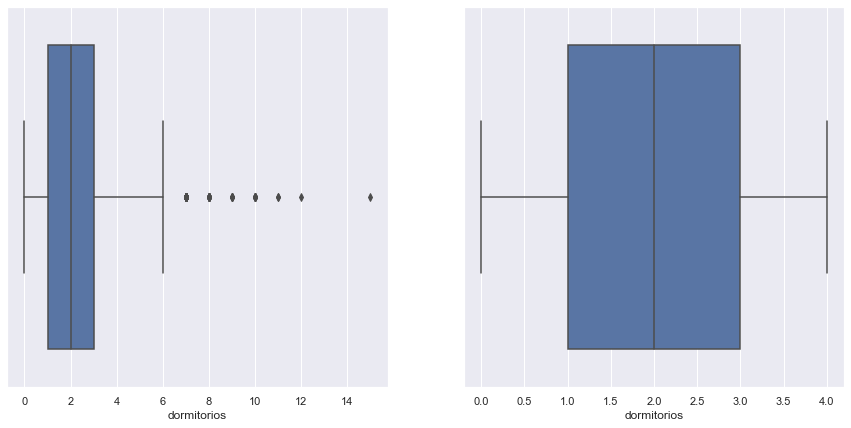

In [53]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA14.dormitorios)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA15.dormitorios)

plt.show()

Valores atípicos ambientes

In [54]:
#estableciendo la eliminación de outliders con sigma
valor_medio = dataA15.ambientes.mean()
std = dataA15.ambientes.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_ambie = np.logical_or(dataA15.ambientes < minimo, dataA15.ambientes > maximo)

In [55]:
dataA16= dataA15.loc[(dataA15.ambientes > minimo) & (dataA15.ambientes < maximo)]

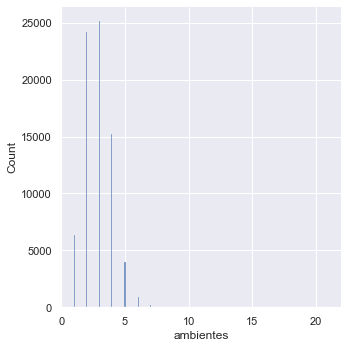

In [56]:
sns.displot(dataA15.ambientes)#, bins = 50, rug = True)

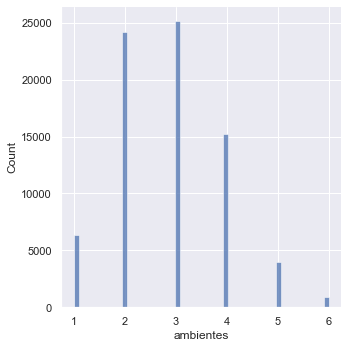

In [57]:
sns.displot(dataA16.ambientes)#, bins = 50, rug = True)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


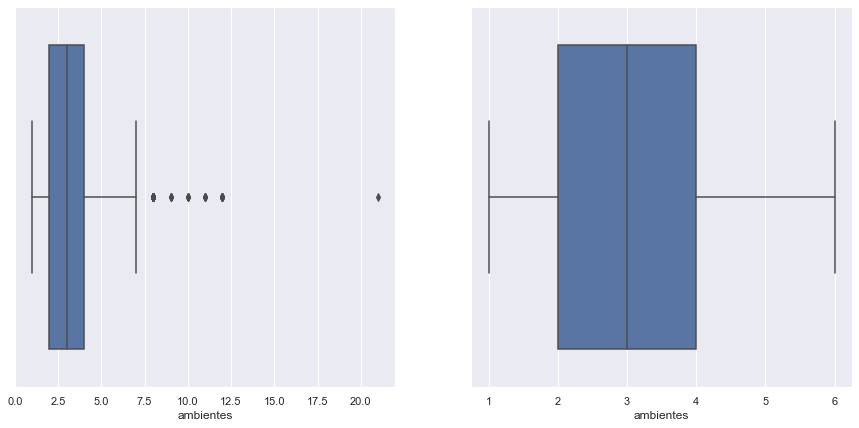

In [58]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(dataA15.ambientes)

#plt.title('Distribución del precio sin eliminación')
plt.subplot(1,2,2)
sns.boxplot(dataA16.ambientes)

plt.show()

In [59]:
dataA16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 1 to 146557
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lat                    72022 non-null  float64
 1   lon                    72022 non-null  float64
 2   provincia              75756 non-null  object 
 3   ciudad                 75756 non-null  object 
 4   ambientes              75756 non-null  float64
 5   dormitorios            75756 non-null  float64
 6   baños                  75756 non-null  float64
 7   superficie_total       75756 non-null  float64
 8   superficie_construida  75756 non-null  float64
 9   price                  75756 non-null  float64
 10  tipo_de_propiedad      75756 non-null  object 
 11  Superficie_Positiva    75756 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.5+ MB


En el proyecto anterior, después de los filtros y mascaras, sacando valores atípicos, el número de datos que quedaron para lanzar un modelo predictivo fue de 81019 datos, y en este después de aplicar el modelo sigma para eliminar valores atípicos, quedan 75756 datos. Uno 93,5% de los datos con relación al proyecto 1, una reducción del 6,5%.

In [60]:
dataA16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 1 to 146557
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lat                    72022 non-null  float64
 1   lon                    72022 non-null  float64
 2   provincia              75756 non-null  object 
 3   ciudad                 75756 non-null  object 
 4   ambientes              75756 non-null  float64
 5   dormitorios            75756 non-null  float64
 6   baños                  75756 non-null  float64
 7   superficie_total       75756 non-null  float64
 8   superficie_construida  75756 non-null  float64
 9   price                  75756 non-null  float64
 10  tipo_de_propiedad      75756 non-null  object 
 11  Superficie_Positiva    75756 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.5+ MB


## 2. Encoding

Tipo de Propiedades

In [61]:
dataA21 = dataA16.copy()

In [62]:
#dataA21.tipo_de_propiedad.count_values
dataA21['tipo_de_propiedad'].value_counts()

Departamento    65356
PH               8904
Casa             1496
Name: tipo_de_propiedad, dtype: int64

In [63]:
dataA21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 1 to 146557
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lat                    72022 non-null  float64
 1   lon                    72022 non-null  float64
 2   provincia              75756 non-null  object 
 3   ciudad                 75756 non-null  object 
 4   ambientes              75756 non-null  float64
 5   dormitorios            75756 non-null  float64
 6   baños                  75756 non-null  float64
 7   superficie_total       75756 non-null  float64
 8   superficie_construida  75756 non-null  float64
 9   price                  75756 non-null  float64
 10  tipo_de_propiedad      75756 non-null  object 
 11  Superficie_Positiva    75756 non-null  float64
dtypes: float64(9), object(3)
memory usage: 7.5+ MB


In [64]:
dataA21

print(len(dataA21))
dataA21.head()

75756


,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,0.0


In [65]:
data_ohe = pd.get_dummies(dataA21['tipo_de_propiedad'], drop_first=False)
data_ohe

,Casa,Departamento,PH
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
6,0,0,1
...,...,...,...
146553,0,1,0
146554,0,0,1
146555,0,0,1
146556,0,0,1


In [66]:
dataA22 = pd.concat([dataA21, data_ohe], axis=1)

In [67]:
y = data.price

In [68]:
dataA22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 1 to 146557
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lat                    72022 non-null  float64
 1   lon                    72022 non-null  float64
 2   provincia              75756 non-null  object 
 3   ciudad                 75756 non-null  object 
 4   ambientes              75756 non-null  float64
 5   dormitorios            75756 non-null  float64
 6   baños                  75756 non-null  float64
 7   superficie_total       75756 non-null  float64
 8   superficie_construida  75756 non-null  float64
 9   price                  75756 non-null  float64
 10  tipo_de_propiedad      75756 non-null  object 
 11  Superficie_Positiva    75756 non-null  float64
 12  Casa                   75756 non-null  uint8  
 13  Departamento           75756 non-null  uint8  
 14  PH                     75756 non-null  uint8  
dtypes

In [69]:
dataA22.head(2)

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva,Casa,Departamento,PH
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0,0,0,1
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0,0,1


In [70]:
#pd.get_dummies(dataA21, columns=['tipo_de_propiedad'], drop_first=False)

In [71]:
# converting type of columns to 'category'
#dataA22 = dataA16.copy()
#dataA22 = dataA22.iloc[:10]
# converting type of columns to 'category'
#dataA22['tipo_de_propiedad'] = dataA22['tipo_de_propiedad'].astype('category')
# Assigning numerical values and storing in another column
#dataA22['propiedad_cat'] = dataA22['tipo_de_propiedad'].cat.codes
#dataA22

In [72]:
#dataA21.tipo_de_propiedad.count_values
dataA22['tipo_de_propiedad'].value_counts()

Departamento    65356
PH               8904
Casa             1496
Name: tipo_de_propiedad, dtype: int64

In [73]:
dataA22['Departamento'].value_counts()

1    65356
0    10400
Name: Departamento, dtype: int64

#como están los valores como Label Encoding o One - Hot Encoding. Preguntar

In [74]:
dataA22['ciudad'].value_counts()

Palermo                 11390
Almagro                  6596
Villa Crespo             5805
Belgrano                 5346
Caballito                5325
Recoleta                 4926
Barrio Norte             2885
Villa Urquiza            2854
Balvanera                2292
Flores                   2002
Nuñez                    1716
Colegiales               1253
Parque Centenario        1221
Villa del Parque         1190
Puerto Madero            1169
Villa Devoto             1167
Paternal                  917
Saavedra                  907
San Cristobal             898
San Telmo                 894
Floresta                  764
Boedo                     719
Retiro                    694
Monserrat                 685
Once                      679
Parque Chacabuco          658
San Nicolás               653
Villa Pueyrredón          632
Chacarita                 631
Barracas                  628
Las Cañitas               579
Liniers                   564
Congreso                  560
Monte Cast

In [75]:
dataA22['ciudad'].shape

(75756,)

**Encoding Ciudad** 

In [76]:
data_ohe2 = pd.get_dummies(dataA22['ciudad'], drop_first=False)
data_ohe2

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = pd.concat([dataA22, data_ohe2], axis=1)

In [78]:
y = data.price

In [79]:
X

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,...,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,...,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,...,0,0,0,0,0,0,0,0,0,0
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,...,0,0,0,0,0,0,0,0,0,0
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,-34.581308,-58.431236,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,...,0,0,0,0,0,0,0,0,0,0
146554,-34.585355,-58.427194,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,...,0,0,0,0,0,0,0,0,0,0
146555,-34.585355,-58.427194,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,...,0,0,0,0,0,0,0,0,0,0
146556,-34.584134,-58.436389,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
pd.get_dummies(dataA22, columns=['ciudad'], drop_first=False)

,lat,lon,provincia,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,...,ciudad_Villa Lugano,ciudad_Villa Luro,ciudad_Villa Ortuzar,ciudad_Villa Pueyrredón,ciudad_Villa Real,ciudad_Villa Riachuelo,ciudad_Villa Santa Rita,ciudad_Villa Soldati,ciudad_Villa Urquiza,ciudad_Villa del Parque
1,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH,...,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH,...,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH,...,0,0,0,0,0,0,0,0,0,0
5,-34.593779,-58.441239,Capital Federal,2.0,1.0,1.0,56.0,56.0,150000.0,PH,...,0,0,0,0,0,0,0,0,0,0
6,-34.600988,-58.433061,Capital Federal,2.0,1.0,1.0,70.0,70.0,159500.0,PH,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,-34.581308,-58.431236,Capital Federal,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,...,0,0,0,0,0,0,0,0,0,0
146554,-34.585355,-58.427194,Capital Federal,4.0,3.0,3.0,175.0,111.0,570000.0,PH,...,0,0,0,0,0,0,0,0,0,0
146555,-34.585355,-58.427194,Capital Federal,3.0,2.0,2.0,144.0,134.0,480000.0,PH,...,0,0,0,0,0,0,0,0,0,0
146556,-34.584134,-58.436389,Capital Federal,4.0,2.0,2.0,317.0,143.0,530000.0,PH,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# converting type of columns to 'category'
#dataA22 = dataA16.copy()
#dataA22 = dataA22.iloc[:10]
# converting type of columns to 'category'
dataA22['ciudad'] = dataA22['ciudad'].astype('category')
# Assigning numerical values and storing in another column
dataA22['ciudad_cat'] = dataA22['ciudad'].cat.codes
dataA22

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva,Casa,Departamento,PH,ciudad_cat
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0,0,0,1,8
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0,0,1,26
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0,0,0,1,26
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0,0,0,1,44
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,0.0,0,0,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,-34.581308,-58.431236,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,6.0,0,1,0,26
146554,-34.585355,-58.427194,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,64.0,0,0,1,26
146555,-34.585355,-58.427194,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,10.0,0,0,1,26
146556,-34.584134,-58.436389,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH,174.0,0,0,1,26


In [82]:
dataA22.head()

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva,Casa,Departamento,PH,ciudad_cat
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,12.0,0,0,1,8
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,0,0,1,26
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,35.0,0,0,1,26
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0.0,0,0,1,44
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,0.0,0,0,1,44


In [83]:
len(pd.unique(dataA22.ciudad))

57

In [84]:
dataA22 = dataA22.sort_values('ciudad')

In [85]:
dataA22.head()

,lat,lon,provincia,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,tipo_de_propiedad,Superficie_Positiva,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,Capital Federal,Abasto,2.0,1.0,1.0,50.0,50.0,109000.0,Departamento,0.0,0,1,0,0
30790,-34.599332,-58.412171,Capital Federal,Abasto,2.0,1.0,2.0,46.0,43.0,132411.0,Departamento,3.0,0,1,0,0
17341,-34.604210,-58.414110,Capital Federal,Abasto,5.0,4.0,2.0,145.0,104.0,330000.0,Departamento,41.0,0,1,0,0
95791,-34.602874,-58.410708,Capital Federal,Abasto,2.0,1.0,1.0,44.0,44.0,99000.0,Departamento,0.0,0,1,0,0
40463,-34.601276,-58.411041,Capital Federal,Abasto,1.0,0.0,1.0,15.0,15.0,40000.0,Departamento,0.0,0,1,0,0


In [86]:
dataA22.isnull().sum()

lat                      3734
lon                      3734
provincia                   0
ciudad                      0
ambientes                   0
dormitorios                 0
baños                       0
superficie_total            0
superficie_construida       0
price                       0
tipo_de_propiedad           0
Superficie_Positiva         0
Casa                        0
Departamento                0
PH                          0
ciudad_cat                  0
dtype: int64

## 3. Imputación de valores faltantes

Se imputan latitud (lat) y longitud (lon) para incluirlos en los modelos y aporte información para la predicción de precios.

In [87]:
dataA22['lat'] = dataA22['lat'].fillna(method='ffill')

In [88]:
dataA22['lon'] = dataA22['lon'].fillna(method='ffill')

In [89]:
dataA22.isnull().sum()

lat                      0
lon                      0
provincia                0
ciudad                   0
ambientes                0
dormitorios              0
baños                    0
superficie_total         0
superficie_construida    0
price                    0
tipo_de_propiedad        0
Superficie_Positiva      0
Casa                     0
Departamento             0
PH                       0
ciudad_cat               0
dtype: int64

In [90]:
dataA22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 117235 to 72742
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   lat                    75756 non-null  float64 
 1   lon                    75756 non-null  float64 
 2   provincia              75756 non-null  object  
 3   ciudad                 75756 non-null  category
 4   ambientes              75756 non-null  float64 
 5   dormitorios            75756 non-null  float64 
 6   baños                  75756 non-null  float64 
 7   superficie_total       75756 non-null  float64 
 8   superficie_construida  75756 non-null  float64 
 9   price                  75756 non-null  float64 
 10  tipo_de_propiedad      75756 non-null  object  
 11  Superficie_Positiva    75756 non-null  float64 
 12  Casa                   75756 non-null  uint8   
 13  Departamento           75756 non-null  uint8   
 14  PH                     75756 non-

In [91]:
pd.unique(dataA22.provincia)

array(['Capital Federal'], dtype=object)

In [92]:
dataA22 = dataA22.drop(['tipo_de_propiedad','Superficie_Positiva','provincia'], axis = 1)

In [93]:
dataA22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75756 entries, 117235 to 72742
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   lat                    75756 non-null  float64 
 1   lon                    75756 non-null  float64 
 2   ciudad                 75756 non-null  category
 3   ambientes              75756 non-null  float64 
 4   dormitorios            75756 non-null  float64 
 5   baños                  75756 non-null  float64 
 6   superficie_total       75756 non-null  float64 
 7   superficie_construida  75756 non-null  float64 
 8   price                  75756 non-null  float64 
 9   Casa                   75756 non-null  uint8   
 10  Departamento           75756 non-null  uint8   
 11  PH                     75756 non-null  uint8   
 12  ciudad_cat             75756 non-null  int8    
dtypes: category(1), float64(8), int8(1), uint8(3)
memory usage: 5.6 MB


**¿a que le hago escalado?¿aplicamos SVD o PCA?** Hacer SVD para reducir dimensionalidad, ¿para què reducir si no sabemos la interpretabilidad?
Restar ST con SC 

In [94]:
dataA23 = dataA22.drop(['ciudad'], axis = 1)

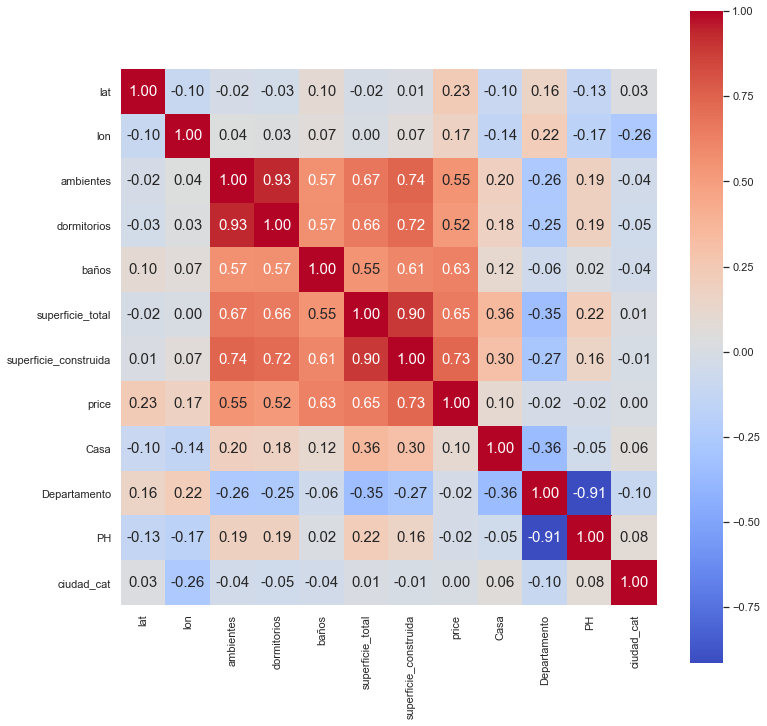

In [95]:
#Corregido
corr = dataA23.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            #xticklabels= dataA23.drop(columns = ['tipo_de_propiedad','ciudad'], axis =1).columns, 
            #yticklabels= dataA23.drop(columns = ['tipo_de_propiedad','ciudad'], axis =1).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

**Evaluación de los modelos del primer poryecto con el nuevo dataset de este proyecto 2** 

In [96]:
X = dataA22.drop(['price','ciudad' ], axis=1)

In [97]:
y = dataA22.price

In [98]:
X.head()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_construida,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,2.0,1.0,1.0,50.0,50.0,0,1,0,0
30790,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,0,1,0,0
17341,-34.604210,-58.414110,5.0,4.0,2.0,145.0,104.0,0,1,0,0
95791,-34.602874,-58.410708,2.0,1.0,1.0,44.0,44.0,0,1,0,0
40463,-34.601276,-58.411041,1.0,0.0,1.0,15.0,15.0,0,1,0,0


In [99]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model1 = LinearRegression()
tree_regressor1 = DecisionTreeRegressor(max_depth=15)  #(max_depth=62) con 62 de profundidad alcanza el máx Rcuadrado 0.90 
                                                       # si me bajo a 15 de profundidad el R2 baja a 0.87  
knn_regressor1 = KNeighborsRegressor(n_neighbors= 3)



In [101]:
linear_model1.fit(X_train, y_train)
tree_regressor1.fit(X_train, y_train)
knn_regressor1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [102]:
# Predicción datos de testeo

y_test_pred1_LiA = linear_model1.predict(X_test)
y_test_pred1_treeA = tree_regressor1.predict(X_test)
y_test_pred1_knnA = knn_regressor1.predict(X_test)



In [103]:
y_train_pred1_LiB = linear_model1.predict(X_train)
y_train_pred1_treeB = tree_regressor1.predict(X_train)
y_train_pred1_knnB = knn_regressor1.predict(X_train)

In [104]:
print(linear_model1.coef_, linear_model1.intercept_)

[ 1.28374196e+06  5.35189013e+05  1.17914906e+04 -2.45291032e+04
  6.13785937e+04  3.10471820e+02  1.99215609e+03 -5.88076165e+04
  5.32444107e+04  5.56320580e+03  5.02359137e+02] 75604524.68303266


**Calculo del R en los tres modelos**

In [105]:
print('Linear')
print('R2 para Testeo:', r2_score(y_test,y_test_pred1_LiA))
print('R2 para Train:', r2_score(y_train,y_train_pred1_LiB))

Linear
R2 para Testeo: 0.654323929677111
R2 para Train: 0.6718159551144586


In [106]:
print('tree')
print('R2 para Testeo:', r2_score(y_test,y_test_pred1_treeA))
print('R2 para Train:', r2_score(y_train,y_train_pred1_treeB))

tree
R2 para Testeo: 0.8619734890792305
R2 para Train: 0.9635684440806322


In [107]:
print('Knn')
print('R2 para Testeo:', r2_score(y_test,y_test_pred1_knnA))
print('R2 para Train:', r2_score(y_train,y_train_pred1_knnB))

Knn
R2 para Testeo: 0.8008429932398662
R2 para Train: 0.9137599533900694


Regresión Lineal

In [108]:
yhat = linear_model1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.6664623339937459 R cuadrado ajustado: 0.6664138956444896


Arbol

In [109]:
yhat = tree_regressor1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)


R Cuadrado: 0.9324725403081046 R cuadrado ajustado: 0.9324627335635887


Knn

In [110]:
yhat = knn_regressor1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)

R Cuadrado: 0.8791986826774911 R cuadrado ajustado: 0.8791811391824216


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 90272.72276880588
Raíz del error cuadrático medio en Test: 93989.36127745034


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


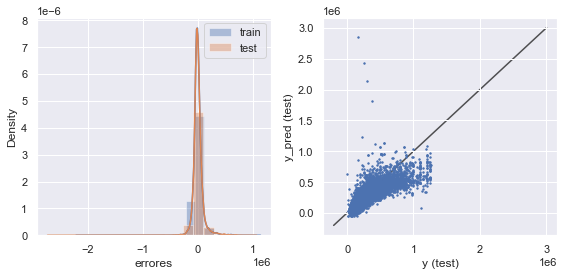

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 30077.149167980293
Raíz del error cuadrático medio en Test: 59391.63690320864


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


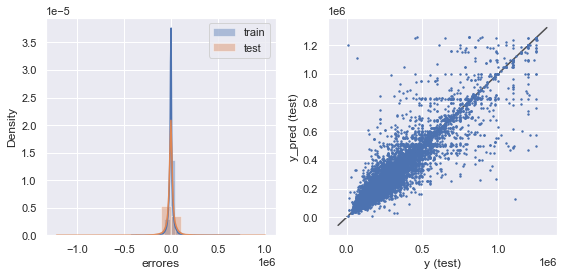

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 46275.62587227886
Raíz del error cuadrático medio en Test: 71341.43412001929


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


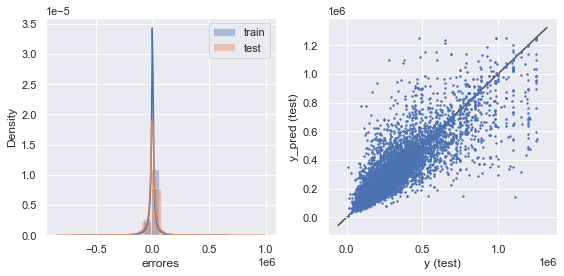

In [111]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model1, tree_regressor1, knn_regressor1]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Tabla A: **Cuadro de Resultados de Metricas** CORREGIR RESULTADOS

|Modelo      | R2    |R2 ajus | RMES train| RMES test|
|:-----------|:-----:|:------:|:---------:|---------:|
|L-Regre MV  |0,55169|0,55668 |199.173     |202.449  |
|Arbol MV    |**0,88112**|**0,88112**|**52.460**|**149.406**  |
|Knn MV      |0,86460|0,864595|77.925     |161.757   |
|L-Regre 1V  |0,47118|0,47117 |216.861    |218.633   |
|Arbol 1V    |0,6155 |0,61558 |177.385    |202.723   |
|Knn 1V      |0,54477|0,544773|243.873    |260.246   | 
|L-Regre MV 2|0,66646|0,666413|90.272     |93.989    |
|Arbol MV 2  |**0,93313**|**0,93312**|**30.077**|**58.924**|
|Knn MV2 n:1 |0,87919|0,879181|46.275     |71.341|  

Comparando los dos modelos **resaltados en negrilla**, hay una mejora sutil en el modelo de arboles regresivo (**Arbol MV 2**) de 5 puntos porcentuales con respecto al modelo final hecho en el anterior proyecto (**Arbol MV**), tanto en el R cuadrado y R cuadrado ajustado. Cabe resaltar que los Errores cuadraticos medios en el modelo, Arbol MV 2 son los más mínimos en relación al resto de modelos. 
 

Por lo tanto, eliminar los outliders con el método sigma, acota de manera eficiente las features que ayudan a predecir la variable precio. Agregar otros datos como los barrios en variables no categoricas y los tipos de inmuebles por medio del encoding al modelo, al parecer dan fortaleza para que el modelo acierte con un % mayor las predicciones que se le propongan.

En conclusión, para este caso. Acotar con el modelo sigma y agregar otras variables al modelo mejora sustancialmente las caracteristicas del modelo a predicir.

**Con reducción de dimensionalidad**

In [112]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import xgboost as xgb
import scipy as sp

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [113]:
dataA22.head(2)

,lat,lon,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,Abasto,2.0,1.0,1.0,50.0,50.0,109000.0,0,1,0,0
30790,-34.599332,-58.412171,Abasto,2.0,1.0,2.0,46.0,43.0,132411.0,0,1,0,0


In [114]:
dataA24 = dataA22.copy()

In [115]:
X1 = dataA24.drop(['price','ciudad' ], axis=1)

In [116]:
pca = TruncatedSVD(n_components = 2)

In [117]:
X1 = pca.fit_transform(X1)

In [118]:
print(pca.explained_variance_ratio_.sum())

0.9152145817049596


In [119]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X1 = escalar.fit_transform(X1) 

In [120]:
X1 = pd.DataFrame(X1)

In [121]:
X1.head(2)

,0,1
0,-0.628975,-0.319448
1,-0.732765,-0.405653


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


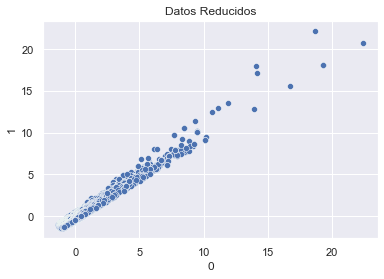

In [122]:
sns.scatterplot(X1[0],X1[1])
plt.title('Datos Reducidos')
plt.show()

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


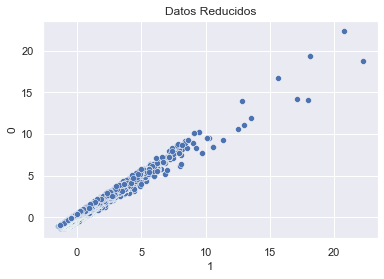

In [123]:
sns.scatterplot(X1[1],X1[0])
plt.title('Datos Reducidos')
plt.show()

In [124]:
y1 = dataA24.price

In [125]:
print(pca.explained_variance_ratio_)

[0.73271866 0.18249592]


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


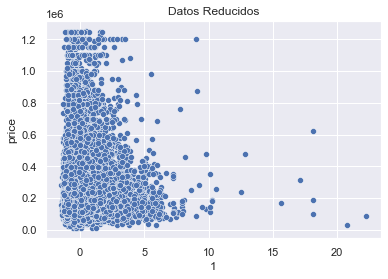

In [126]:
sns.scatterplot(X1[1],y1)
plt.title('Datos Reducidos')
plt.show()

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


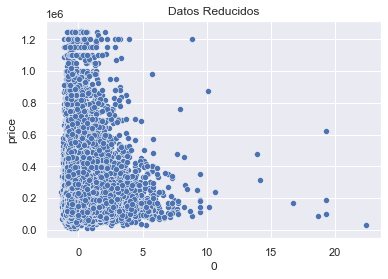

In [127]:
sns.scatterplot(X1[0],y1)
plt.title('Datos Reducidos')
plt.show()

In [128]:

X_train, X_test, y_train, y_test = train_test_split(X1[0], y1, test_size=0.30, random_state=42)

In [129]:
print('Proporción Train :', y_train.sum()/y_train.size)
print('Proporción Test :', y_test.sum()/y_test.size)

Proporción Train : 220236.7284693281
Proporción Test : 219909.03608043297


In [130]:
linear = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [131]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
#X1[0] = np.array(X1[0]).reshape(-1,1)

In [132]:
linear.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsRegressor()

**Optimización de los datos con reducción, Modelo Lineal**

In [133]:
from sklearn.base import BaseEstimator
BaseEstimator.get_params(LinearRegression).keys()

C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [134]:
#Grilla Linear
params = {'copy_X':[False,True],'fit_intercept':[False,True], 
          'n_jobs':[-1],'normalize':[False,True]}
ML = GridSearchCV(linear, param_grid = params, cv = 3)

In [135]:
ML.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [False, True],
                         'fit_intercept': [False, True], 'n_jobs': [-1],
                         'normalize': [False, True]})

In [136]:
print('Los mejores Parametros :'+str(ML.best_params_))
print('El mejor Score :'+str(ML.best_score_)+'n')

Los mejores Parametros :{'copy_X': False, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}
El mejor Score :0.4938065010364974n


In [137]:
cross_ML = LinearRegression(copy_X= False, fit_intercept = True , n_jobs = -1, normalize = False )
cross_ML.fit(X_train,y_train)
linear_scores = cross_val_score(cross_ML,np.array(X1[0]).reshape(-1,1), y1, cv = 5)

In [138]:
print('Accuracy para Lineal: %0.2f (+/- %0.2f)' % (linear_scores.mean(),linear_scores.std()*2))

Accuracy para Lineal: 0.39 (+/- 0.37)


In [139]:
y_prede_train = cross_ML.predict(X_train)
y_prede_test = cross_ML.predict(X_test)

In [140]:
print('R2 para Testeo:', r2_score(y_test,y_prede_test))
print('R2 para Train:', r2_score(y_train,y_prede_train))

R2 para Testeo: 0.48532774241574994
R2 para Train: 0.49440130141245087


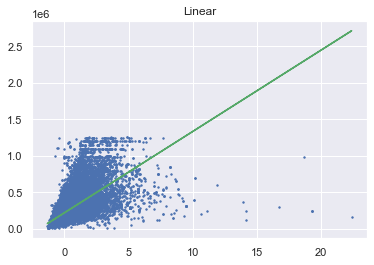

In [141]:
plt.scatter(X1[0],y1,s=2)
plt.plot(X1[0],cross_ML.predict(np.array(X1[0]).reshape(-1,1)), label = 'Regresion lineal', c = 'g')
plt.title('Linear')
plt.show()

**Optimización de los datos con reducción, Modelo Arboles**

In [142]:
BaseEstimator.get_params(DecisionTreeRegressor).keys()

C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [143]:
#Grilla tree
params = {'max_depth':sp.stats.randint(1,50),'max_features':['auto', 'sqrt', 'log2']}


Se eligieron este rango de 1 a 50 los niveles de profundidad del árbol, atendiendo a los resultados del trabajo anterior. Si bien, una profundidad de alrededor de 50 puede subir la metrica de R cuadrado a valores más altos, según el proyecto 1, se corre el riesgo de estar sobreajustado. Por lo cual, se dejo a la optimización de los parametros con Random Search para buscar el mejor sin caer en overfiting.

In [144]:
MT = RandomizedSearchCV(tree, params, n_iter=100,cv = 5, random_state=0)

In [145]:
MT.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C3CF4054F0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=0)

In [146]:
print('Los mejores Parametros :'+str(MT.best_params_))
print('El mejor Score :'+str(MT.best_score_)+'n')

Los mejores Parametros :{'max_depth': 11, 'max_features': 'log2'}
El mejor Score :0.6084908224005614n


In [262]:
cross_MT = DecisionTreeRegressor(max_depth=11) #, max_features = ['log2'])

In [263]:
cross_MT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11)

In [264]:
tree_scores = cross_val_score(cross_MT,np.array(X1[0]).reshape(-1,1), y1, cv = 5)

In [265]:
print('Accuracy para Lineal: %0.2f (+/- %0.2f)' % (tree_scores.mean(),tree_scores.std()*2))

Accuracy para Lineal: 0.38 (+/- 0.53)


In [266]:
y_prede_train = cross_MT.predict(X_train)
y_prede_test = cross_MT.predict(X_test)

In [267]:
print('R2 para Testeo:', r2_score(y_test,y_prede_test))
print('R2 para Train:', r2_score(y_train,y_prede_train))

R2 para Testeo: 0.6166440463814011
R2 para Train: 0.6801026425174557


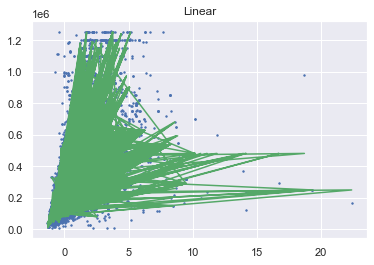

In [153]:
plt.scatter(X1[0],y1,s=2)
plt.plot(X1[0],cross_MT.predict(np.array(X1[0]).reshape(-1,1)), label = 'Arbol', c = 'g')
plt.title('Linear')
plt.show()

**Optimización de los datos con reducción, Modelo Knn**

In [154]:
BaseEstimator.get_params(KNeighborsRegressor).keys()

C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X1[0], y1, test_size=0.30, random_state=42)

In [156]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [157]:
#Grilla Knn
params = {'n_neighbors':sp.stats.randint(1,40),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
MK = RandomizedSearchCV(knn, params, n_iter=100,cv = 5, random_state=0)

In [158]:
MK.fit(X_train,y_train) 

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C4005B9BB0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [159]:
print('Los mejores Parametros :'+str(MK.best_params_))
print('El mejor Score :'+str(MK.best_score_)+'n')

Los mejores Parametros :{'algorithm': 'auto', 'n_neighbors': 39, 'weights': 'distance'}
El mejor Score :0.7404255468623696n


In [160]:
cross_MK = KNeighborsRegressor(algorithm='auto', n_neighbors = 39, weights = 'distance')
cross_MK.fit(X_train,y_train)
knn_scores = cross_val_score(cross_MK,np.array(X1[0]).reshape(-1,1), y1, cv = 5)

In [161]:
print('Accuracy para Lineal: %0.2f (+/- %0.2f)' % (knn_scores.mean(),knn_scores.std()*2))

Accuracy para Lineal: 0.36 (+/- 0.68)


In [162]:
y_prede_train = cross_MK.predict(X_train)
y_prede_test = cross_MK.predict(X_test)

In [163]:
print('R2 para Testeo:', r2_score(y_test,y_prede_test))
print('R2 para Train:', r2_score(y_train,y_prede_train))

R2 para Testeo: 0.7624300163215324
R2 para Train: 0.9986281592371458


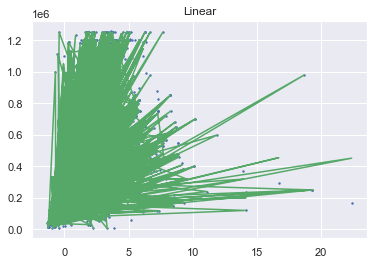

In [164]:
plt.scatter(X1[0],y1,s=2)
plt.plot(X1[0],cross_MK.predict(np.array(X1[0]).reshape(-1,1)), label = 'knn', c = 'g')
plt.title('Linear')
plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 112047.14206521516
Raíz del error cuadrático medio en Test: 114685.84230848988


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


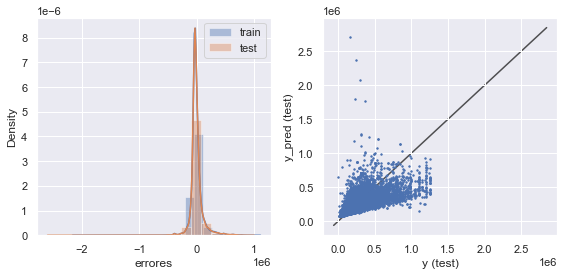

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 6337.445312093702
Raíz del error cuadrático medio en Test: 97255.27212975499


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


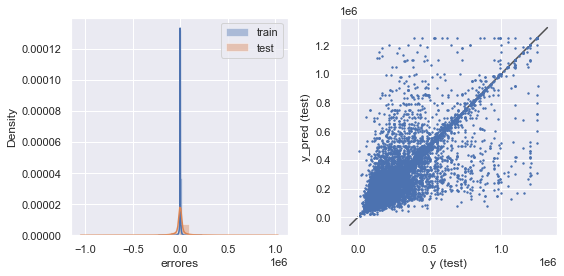

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 113974.13136844152
Raíz del error cuadrático medio en Test: 117106.66377873358


C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


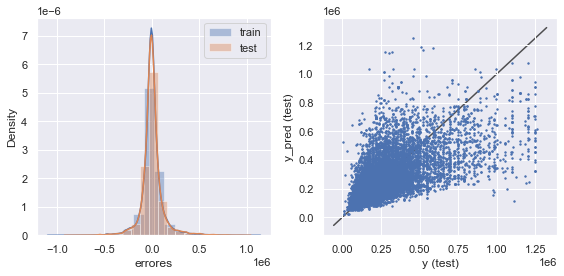

In [165]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear, tree, knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### PARTE B MODELOS AVANZADOS

In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [167]:
dataA25 = dataA22.copy()

In [168]:
dataA25.head(2)

,lat,lon,ciudad,ambientes,dormitorios,baños,superficie_total,superficie_construida,price,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,Abasto,2.0,1.0,1.0,50.0,50.0,109000.0,0,1,0,0
30790,-34.599332,-58.412171,Abasto,2.0,1.0,2.0,46.0,43.0,132411.0,0,1,0,0


In [169]:
from sklearn.model_selection import train_test_split
X = dataA25.drop(['price', 'ciudad' ], axis=1)

y = dataA25[['price']] 
X_trainp, X_testp, y_trainp, y_testp = train_test_split( X, y, test_size=0.25, random_state=42)

In [170]:
X

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_construida,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,2.0,1.0,1.0,50.0,50.0,0,1,0,0
30790,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,0,1,0,0
17341,-34.604210,-58.414110,5.0,4.0,2.0,145.0,104.0,0,1,0,0
95791,-34.602874,-58.410708,2.0,1.0,1.0,44.0,44.0,0,1,0,0
40463,-34.601276,-58.411041,1.0,0.0,1.0,15.0,15.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79440,-34.599252,-58.485485,3.0,2.0,1.0,75.0,73.0,0,1,0,56
17049,-34.602897,-58.493911,4.0,3.0,1.0,107.0,85.0,0,1,0,56
17048,-34.595990,-58.499550,4.0,3.0,1.0,105.0,89.0,0,1,0,56
79444,-34.599252,-58.485485,3.0,2.0,1.0,75.0,73.0,0,1,0,56


In [171]:
y

,price
117235,109000.0
30790,132411.0
17341,330000.0
95791,99000.0
40463,40000.0
...,...
79440,194000.0
17049,259000.0
17048,210000.0
79444,198000.0


In [172]:
X_trainp.shape, X_testp.shape, y_trainp.shape, y_testp.shape

((56817, 11), (18939, 11), (56817, 1), (18939, 1))

In [173]:
from sklearn.preprocessing import PolynomialFeatures

In [174]:
poly = PolynomialFeatures() #Degree: hiperparametro
X_train_new = poly.fit_transform(X_trainp)
X_test_new = poly.fit_transform(X_testp)

In [175]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_trainp)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[[-1.34871204e+00  7.29139638e+08  7.93772510e+08 -2.08828095e+06
  -1.95523960e+07  1.97741630e+07  9.63651789e+04  8.48251834e+05
  -2.44885117e+07  1.38704135e+07  1.06180977e+07  3.41270556e+05
   3.20125840e+06  1.28496183e+07  2.63175783e+05 -1.23080255e+05
  -5.73509090e+03 -4.59218453e+02  1.49700646e+04  2.42639811e+08
   2.43339686e+08  2.43160129e+08  1.62901168e+03  5.25397510e+06
  -2.04210288e+05 -3.73453734e+05  4.53904965e+05  2.45603402e+03
   1.04741893e+04  2.63994275e+08  2.64891658e+08  2.64886578e+08
   6.81852221e+03 -3.50116740e+03  1.11469279e+04 -3.46591207e+04
  -5.09635292e+01  2.60337029e+02 -6.86792777e+05 -7.08109812e+05
  -6.93378760e+05 -3.61436653e+02 -6.80305896e+03  1.78934734e+04
  -9.72257103e+01 -3.63183031e+02 -6.50431699e+06 -6.53509264e+06
  -6.51298496e+06 -2.98720176e+02  4.00087062e+03  1.40531065e+02
   2.69654858e+02  6.58228831e+06  6.60543097e+06  6.58644457e+06
   4.62332783e+02 -8.97204518e-01  2.30931160e+00  3.20887602e+04
   3.23235

In [176]:
print('R2 para Testeo:', r2_score(y_testp,y_test_pred_2))
print('R2 para Train:', r2_score(y_trainp,y_train_pred_2))

R2 para Testeo: 0.7680244689668605
R2 para Train: 0.7743740226742625


In [177]:
 ### CALCULAMOS EL ERROR
rmse_train = np.sqrt(mean_squared_error(y_trainp, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_testp, y_test_pred_2))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 74833.78005407818
Raíz del error cuadrático medio en Test: 77262.35931018449


In [178]:
Score = cross_val_score(reg_2, X_trainp, y_trainp, cv=5)
print('Mean cross-validation score: %.2f'% Score.mean())

Mean cross-validation score: 0.67


Text(0, 0.5, 'prediccion')

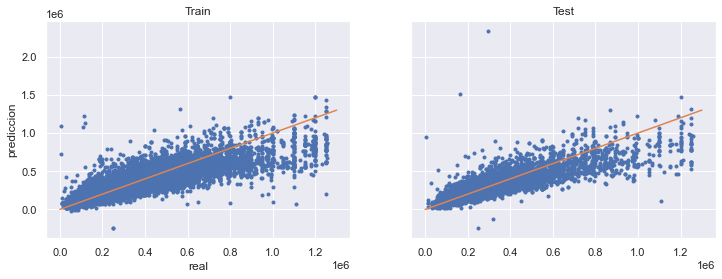

In [179]:
%matplotlib inline
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))
ax[0].plot(y_trainp, y_train_pred_2, '.')
ax[1].plot(y_testp, y_test_pred_2, '.')
ax[0].plot((0, 1300000), (0, 1300000),'-')
ax[1].plot((0, 1300000), (0, 1300000),'-')

ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_xlabel('real')
ax[0].set_ylabel('prediccion')

In [180]:
from sklearn.linear_model import Ridge, Lasso
reg_R = Ridge(alpha = 0.1)
reg_R.fit(X_train_new, y_trainp)
print(f'Pendiente : {reg_R.coef_}')
print(f'Ordenada : {reg_R.intercept_}')

Pendiente : [[ 0.00000000e+00  1.64614692e+04  4.96868380e+04 -7.37942124e+05
  -6.85857099e+05  4.96891376e+05 -4.71246999e+04  8.05540265e+05
  -2.06872793e+05  4.60029586e+05 -2.53156797e+05 -2.32721089e+05
  -2.47814478e+05  2.91226014e+05  2.93101028e+05  2.00168316e+05
  -3.83813913e+05 -2.73892598e+03  1.38644878e+04  1.19925874e+05
  -6.67883661e+04 -3.66761494e+04 -1.27459640e+04 -8.47822728e+04
  -1.90955952e+05 -1.34686899e+05  2.38073289e+05  5.31042297e+02
   1.01555830e+04 -5.78872311e+04  7.50458689e+04  3.25280750e+04
   2.21916791e+03 -2.70191066e+03  9.30960966e+03 -3.37323260e+04
  -5.03412167e+01  2.86447688e+02 -2.43628639e+05 -2.53686582e+05
  -2.40626904e+05 -3.43036416e+02 -4.94022742e+03  1.31661053e+04
  -4.45224290e+01 -4.90206333e+02 -1.96818389e+05 -2.60513171e+05
  -2.28525537e+05 -2.47957190e+02  5.50937419e+03  1.18324878e+02
   3.73208381e+02  1.47813906e+05  1.88884531e+05  1.60192953e+05
   4.67541638e+02 -8.61756904e-01  1.44967462e+00 -1.57133247e+0

###  XGBoost: 

In [182]:
import xgboost as xgb
from xgboost import XGBRegressor
modelXGB = XGBRegressor()


In [183]:
X = dataA24.drop(['price', 'ciudad' ], axis=1)

In [184]:
X.head()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_construida,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,2.0,1.0,1.0,50.0,50.0,0,1,0,0
30790,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,0,1,0,0
17341,-34.604210,-58.414110,5.0,4.0,2.0,145.0,104.0,0,1,0,0
95791,-34.602874,-58.410708,2.0,1.0,1.0,44.0,44.0,0,1,0,0
40463,-34.601276,-58.411041,1.0,0.0,1.0,15.0,15.0,0,1,0,0


In [185]:
y = dataA24.price

In [186]:
X_trainz, X_testz, y_trainz, y_testz = train_test_split( X, y, test_size=0.25, random_state=42)

In [187]:
dtrain = xgb.DMatrix(X_trainz, y_trainz)
dtest = xgb.DMatrix(X_testz)

In [188]:
param_x = {'n_estimators':sp.stats.randint(1,20),'max_depth':sp.stats.randint(1,20)}

In [189]:
xgb1 = RandomizedSearchCV(modelXGB, param_x, n_iter=100, random_state=0, cv = 5)

In [190]:
xgb1.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [191]:
print('Los mejores Parametros :'+str(xgb1.best_params_))
print('El mejor Score :'+str(xgb1.best_score_)+'n')

Los mejores Parametros :{'max_depth': 19, 'n_estimators': 15}
El mejor Score :0.6868832111609806n


In [192]:
xgbr = xgb.XGBRegressor(max_depth=17, n_estimators=18)

In [193]:
xgb_b = xgbr.fit(X_trainz,y_trainz)

In [194]:
Score = cross_val_score(xgbr, X_trainz, y_trainz, cv=5)
print('Mean cross-validation score: %.2f'% Score.mean())

Mean cross-validation score: 0.91


In [195]:
y_pred_testz = xgbr.predict(X_testz)
y_pred_trainz = xgbr.predict(X_trainz)

In [196]:
print('R2 para Testeo:', r2_score(y_testz,y_pred_testz))
print('R2 para Train:', r2_score(y_trainz,y_pred_trainz))

R2 para Testeo: 0.9166686898576599
R2 para Train: 0.9944632858336953


In [197]:
 ### CALCULAMOS EL ERROR
rmse_train = np.sqrt(mean_squared_error(y_trainz,y_pred_trainz))
rmse_test = np.sqrt(mean_squared_error(y_testz,y_pred_testz))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 11722.741400544755
Raíz del error cuadrático medio en Test: 46307.46231174794


**CON REDUCCIÓN DE DIMENCIONALIDAD**

In [198]:
import xgboost as xgb
from xgboost import XGBRegressor
modelXGB2 = XGBRegressor()


In [199]:
X1.head(2)

,0,1
0,-0.628975,-0.319448
1,-0.732765,-0.405653


In [200]:
y1.head()

117235    109000.0
30790     132411.0
17341     330000.0
95791      99000.0
40463      40000.0
Name: price, dtype: float64

In [201]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X1, y1, test_size=0.25, random_state=42)

In [202]:
dtrain = xgb.DMatrix(X_train2, y_train2)
dtest = xgb.DMatrix(X_test2)

In [203]:
param_x = {'n_estimators':sp.stats.randint(1,20),'max_depth':sp.stats.randint(1,20)}

In [204]:
xgb2 = RandomizedSearchCV(modelXGB2, param_x, n_iter=100, random_state=0, cv = 5)

In [205]:
xgb2.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [206]:
print('Los mejores Parametros :'+str(xgb2.best_params_))
print('El mejor Score :'+str(xgb2.best_score_)+'n')

Los mejores Parametros :{'max_depth': 19, 'n_estimators': 15}
El mejor Score :0.6868832111609806n


In [207]:
xgbr2 = xgb.XGBRegressor(max_depth=17, n_estimators=18)

In [208]:
xgb_b2 = xgbr2.fit(X_train2,y_train2)

In [209]:
Score2 = cross_val_score(xgbr2, X_train2, y_train2, cv=5)
print('Mean cross-validation score: %.2f'% Score2.mean())

Mean cross-validation score: 0.76


In [210]:
y_pred_test2 = xgbr2.predict(X_test2)
y_pred_train2 = xgbr2.predict(X_train2)

In [211]:
print('R2 para Testeo:', r2_score(y_test2,y_pred_test2))
print('R2 para Train:', r2_score(y_train2,y_pred_train2))

R2 para Testeo: 0.7869449256481822
R2 para Train: 0.944271667085558


In [212]:
 ### CALCULAMOS EL ERROR
rmse_train = np.sqrt(mean_squared_error(y_test2,y_pred_test2))
rmse_test = np.sqrt(mean_squared_error(y_train2,y_pred_train2))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 74044.502272037
Raíz del error cuadrático medio en Test: 37191.28283558746


Text(0, 0.5, 'prediccion')

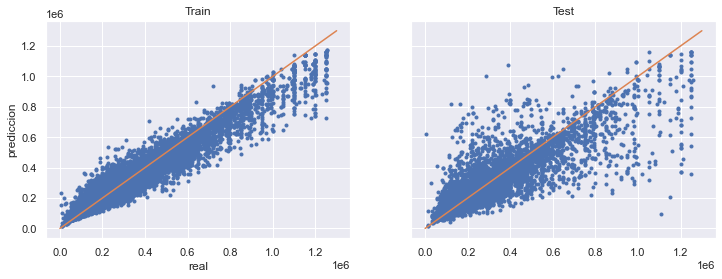

In [213]:
%matplotlib inline
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))
ax[0].plot(y_train2, y_pred_train2, '.')
ax[1].plot(y_test2, y_pred_test2, '.')
ax[0].plot((0, 1300000), (0, 1300000),'-')
ax[1].plot((0, 1300000), (0, 1300000),'-')

ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_xlabel('real')
ax[0].set_ylabel('prediccion')

In [214]:
from sklearn.linear_model import Ridge, Lasso
reg_R = Ridge(alpha = 0.1)
reg_R.fit(X_train2, y_train2)
print(f'Pendiente : {reg_R.coef_}')
print(f'Ordenada : {reg_R.intercept_}')

Pendiente : [147883.776728   -37727.64651393]
Ordenada : 219969.44704617935


**Otro modelo Random Forest**

In [218]:
from sklearn.ensemble import RandomForestRegressor

In [219]:
X = dataA24.drop(['price', 'ciudad' ], axis=1)

In [220]:
X.head()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_construida,Casa,Departamento,PH,ciudad_cat
117235,-34.603890,-58.410998,2.0,1.0,1.0,50.0,50.0,0,1,0,0
30790,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,0,1,0,0
17341,-34.604210,-58.414110,5.0,4.0,2.0,145.0,104.0,0,1,0,0
95791,-34.602874,-58.410708,2.0,1.0,1.0,44.0,44.0,0,1,0,0
40463,-34.601276,-58.411041,1.0,0.0,1.0,15.0,15.0,0,1,0,0


In [221]:
y = dataA24.price

In [222]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split( X, y, test_size=0.25, random_state=42)

In [223]:
rf_reg = RandomForestRegressor()

In [224]:
rf_reg.fit(X_trainf, y_trainf)

RandomForestRegressor()

In [225]:
y_train_predf2 = rf_reg.predict(X_trainf)
y_test_predf2 = rf_reg.predict(X_testf)

Text(0, 0.5, 'prediccion')

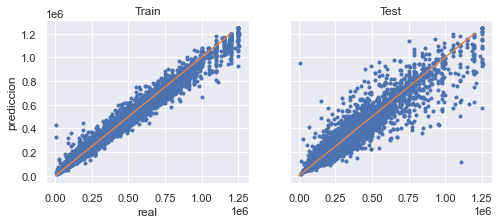

In [226]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 3))
ax[0].plot(y_trainf, y_train_predf2, '.')
ax[1].plot(y_testf, y_test_predf2, '.')
ax[0].plot((0, 1200000), (0, 1200000))
ax[1].plot((0, 1200000), (0, 1200000))
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_xlabel('real')
ax[0].set_ylabel('prediccion')

In [227]:
error_trainf = r2_score(y_trainf, y_train_predf2)
error_testf = r2_score(y_testf, y_test_predf2)
error_trainf, error_testf

(0.9881580768293255, 0.9219417036661366)

In [228]:
rf_reg = RandomForestRegressor()
clf = cross_validate(rf_reg, X_trainf, y_trainf, cv=5, scoring='r2')

In [229]:
mean_scoref = clf['test_score'].mean()
desv_scoref = clf['test_score'].std()
mean_scoref, desv_scoref

(0.9167728789101428, 0.005528374335558312)

Hiperparametros

In [230]:
rf_reg = RandomForestRegressor()

In [231]:
rs_cv = RandomizedSearchCV(rf_reg, cv=5, n_iter=10, 
                           param_distributions={'max_features': sp.stats.randint(1,20),'n_estimators': sp.stats.randint(1,20)})

In [232]:
rs_cv.fit(X_trainf, y_trainf)

C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Camilo\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Camilo\miniconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Camilo\miniconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Camilo\miniconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C4197DFC70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C4197DFD60>})

In [235]:
print('Los mejores Parametros :'+str(rs_cv.best_params_))
print('El mejor Score :'+str(rs_cv.best_score_)+'n')

Los mejores Parametros :{'max_features': 1, 'n_estimators': 11}
El mejor Score :0.9080836746148115n


In [236]:
rf_reg2 = RandomForestRegressor(max_features=8, n_estimators=18)

In [237]:
rf_reg2.fit(X_trainf, y_trainf)

RandomForestRegressor(max_features=8, n_estimators=18)

In [238]:
y_train_predf2 = rf_reg2.predict(X_trainf)
y_test_pred2f = rf_reg2.predict(X_testf)

Text(0, 0.5, 'prediccion')

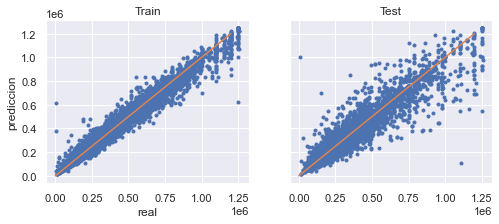

In [239]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 3))
ax[0].plot(y_trainf, y_train_predf2, '.')
ax[1].plot(y_testf, y_test_pred2f, '.')
ax[0].plot((0, 1200000), (0, 1200000))
ax[1].plot((0, 1200000), (0, 1200000))
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_xlabel('real')
ax[0].set_ylabel('prediccion')

In [240]:
error_trainf = r2_score(y_trainf, y_train_predf2)
error_testf = r2_score(y_testf, y_test_pred2f)
error_trainf, error_testf

(0.985885274748198, 0.920721770173252)

In [241]:
rf_reg = RandomForestRegressor()
clf = cross_validate(rf_reg2, X_trainf, y_trainf, cv=5, scoring='r2')

In [242]:
mean_scoref = clf['test_score'].mean()
desv_scoref = clf['test_score'].std()
mean_scoref, desv_scoref

(0.9133512136624651, 0.00519340510721072)

In [243]:
print('R2 para Testeo:', r2_score(y_testf, y_test_pred2f))
print('R2 para Train:', r2_score(y_trainf, y_train_predf2))

R2 para Testeo: 0.920721770173252
R2 para Train: 0.985885274748198


In [244]:
 ### CALCULAMOS EL ERROR
rmse_train = np.sqrt(mean_squared_error(y_trainf, y_train_predf2))
rmse_test = np.sqrt(mean_squared_error(y_testf, y_test_pred2f))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 18717.133904741906
Raíz del error cuadrático medio en Test: 45167.270775622936


## 3. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica. 

A continuación se presenta la Tabla 2 con los resultados del R cuadrado en relación al test y al train. Ademas, del RMES también del train y test.

|Modelo      |R2 test|R2 train| RMES train| RMES test|
|:-----------|:-----:|:------:|:---------:|---------:|
|Linear  MV 2|0,65432|0,671815|90.272     |93.989    |
|**Arbol MV 2**|**0,86431**|**0,96356**|**30.077**|**58.924**|
|Knn MV 2    |0,80084|0,913759|46.275     |71.341    |  
|Linear Red  |0,48532|0,494401|112.047    |114.685   |
|Arbol Red   |0,50491|0,703619|6.339      |144.452   |
|Knn Red     |0,76243|0,998628|74.033     |116.479   |
|Poly        |0,76802|0,774374|74.833     |77.262    |
|**XGboost** |**0,91666**|**0,994463**|**11.722**|**46.307**|
|XGboost Red |0,78694|0,944271|74.044     |37.191    | 
|**RandomForest**|**0,92052**|**0,985952**|**18.672**     |**45.222**|

Como se puede observar en la Tabla 2 se presentan los modelos en orden, de arriba hacia abajo, los modelos sencillos hasta los modelos más avanzados. 
El mejor modelo de la parte A, como ya lo habiamos comentado es el (**Arbol MV 2**) Arbol regresivo multivariable. De los modelos sencillos entre la regresión lineal, Knn vecinos, y sumando los mismos modelos pero con los datos reducios, el que tiene mejor resultados en las metricas de evaluación, como lo es el R cuadrado y los errores cuadraticos medios, sigue siendo el Arbol de desición regresivo tomando encuenta todas las variables introducidas, como barrios y departamentos. 

Sin embargo, al compararlo con los modelos avanzados que mejor se desempeñaron, como lo fue el XGboost y Random Forest se queda un poco corto. Además de que en los R cuadrados tanto en test como en train es superado por los modelos avanzados; tambien lo hacen con el RMES. Y La diferencia entre R test y R train es del alrededor del 10%, el cual es superior a la diferencia entre los modelos avanzados, lo que podemos sugerir que está un poco más sobreajustado que los modelos avanzado.

Entre los modelos avanzados los dos mejores modelos que se destacan son el XGboost y Random Forest(resaltados en la tabla 2 con negrilla), sus R cuadrados y errores cuadraticos medios son mejor que el resto. Pero por mínima diferecia, entre sus R cuadrados y RMSE, el modelo con mejor desempeño y "menos overfiting" es el **Random Forest**. No sobra resaltar, que el modelo Random Forest es el mejor modelo de todos los probados dados los resultados, tiene mejor R cuadrado y menores errores cuadraticos medios, lo cual lo hacen el modelo ideal para este ejercicio.

Por otro lado, la reducción de dimensinalidad no jugó un papel importante en la construcción de los modelos, tanto en modelos sencillos como en modelos avanzados los resultados empeoraban, en relación a los modelos en los cuales teniamos encuenta todos los atributos (features). Esto quiza, se debe a la forma como se agregó las variables categoricas de barrio y tipo de departamento al dataset. A lo mejor, para la reducción de dimensionalidad, hubiera sido mejor agregar la latitud y longitud como datos para la predicción del precio y agregar label encoding a los tipos de propiedad. 
En todo caso, sería otra ruta para trabajar las herramientas de este proyecto.

## Parte C 

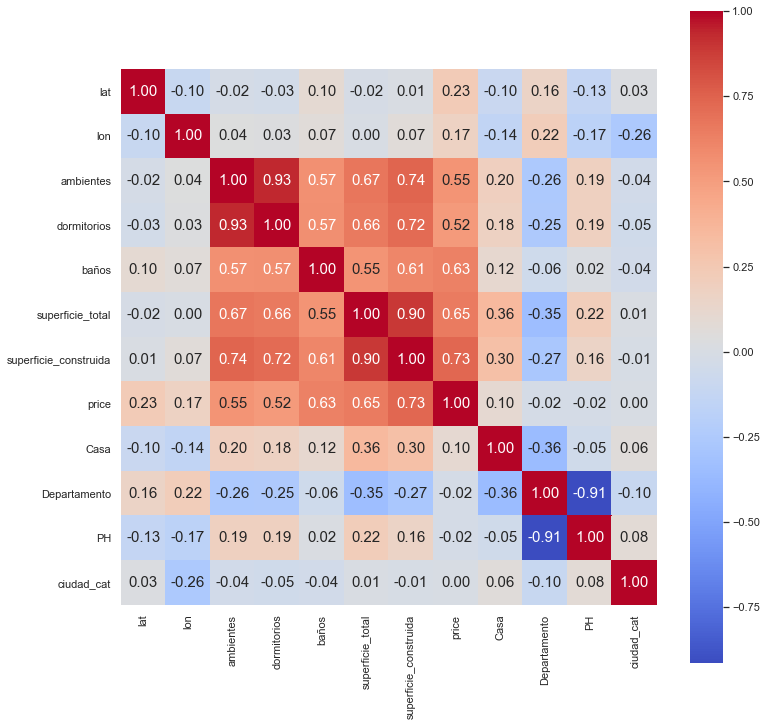

In [245]:
#Corregido
corr = dataA23.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            #xticklabels= dataA23.drop(columns = ['tipo_de_propiedad','ciudad'], axis =1).columns, 
            #yticklabels= dataA23.drop(columns = ['tipo_de_propiedad','ciudad'], axis =1).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


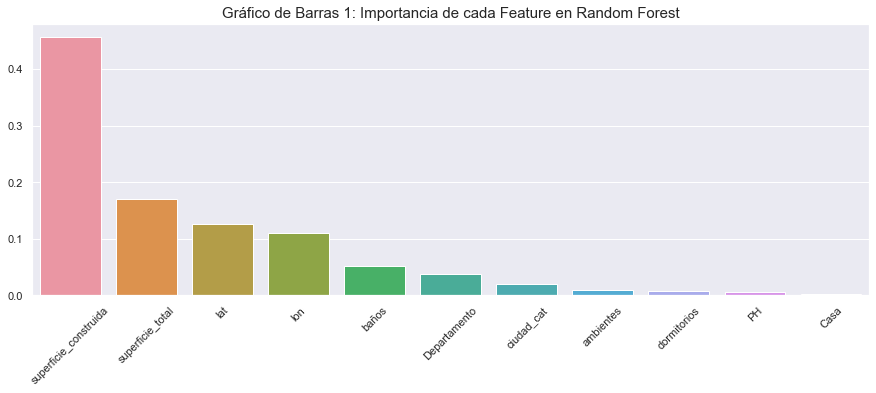

In [246]:
importances = rf_reg2.feature_importances_
columns = X_trainf.columns
plt.figure(figsize = (15,5))
indices = np.argsort(importances)[::-1]
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=45)
plt.title('Gráfico de Barras 1: Importancia de cada Feature en Random Forest', fontsize=15)
plt.show()

Como se muestra en el Gráfico de barras 1, los mejores dos atributos del modelo de Random Forest para la predicción son los atributos de **superficie construida y Superficie Total**. Estas dos variables se esperaba que fueran importantes, por lo que a la hora de comprar un bien inmueble estos son atributos que siempre sale a la vista y se evalua a la hora de comprar precios con otros bienes inmuebles.

La sorpresa fue con **latitud(lat) y longitud (lon)** no había una correlación muy elevada con relación al precio y estaba por debajo de features como baños, ambientes y dormitorios. Pero lograron aportar un poco más del 10% que las variables más correlacionadas mencionadas con el precio. Por lo que fue una buena desición incorporar las variables longitud y atitud al modelo.

Por otro lado, el tipo de propiedad: **Departamento**, tambien aportó un poco al modelo de Random Forest. Esto puede explicarse por la cantidad de datos predominantes que hay de departamento publicados para la venta en el dataset; en contraste, los otros tipos de propiedad como lo son PH y Casa no aportaron nada o casi nada al modelo.

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


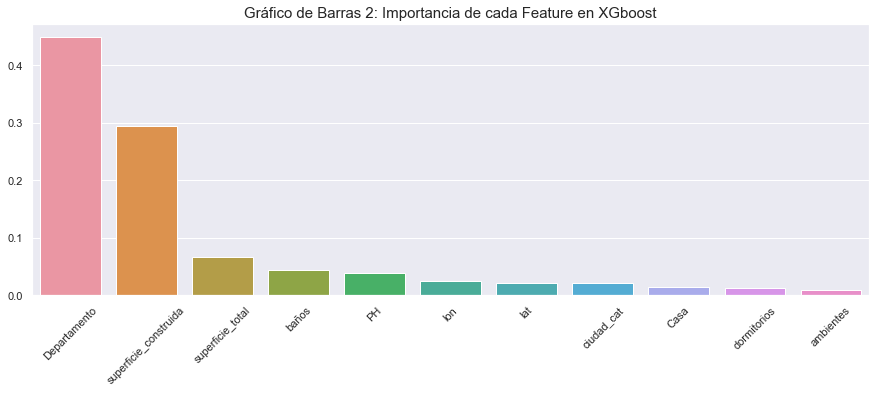

In [247]:
importances = xgbr.feature_importances_
columns = X_trainz.columns
plt.figure(figsize = (15,5))
indices = np.argsort(importances)[::-1]
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=45)
plt.title('Gráfico de Barras 2: Importancia de cada Feature en XGboost', fontsize=15)
plt.show()

En el gráfico de barras 2 para sopresa, la mejor feature que ayuda al modelo XGboost para la predicción fue el tipo de propiedad **Departamento**, seguido de **Superficie construida**, superficie total, seguido de baños, PH, longitud y latitud en menor medida.

Sin embargo, las dos principales variables que ayudan a la predicción del modelo fue **Departamento** y **Superficie Contruida**. La primera variable Departamento se puede explicar por la cantidad de departamentos publicados en el dataset, por lo que es entendible que sea un atributo importante para el modelo.

Cabe destacar que las otras variables, aunque en mucha menor medida, aportan con sus datos al modelo. Por lo que se destaca que no hubo ninguna feature sin aportar nada o casi nada.

## Errores

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


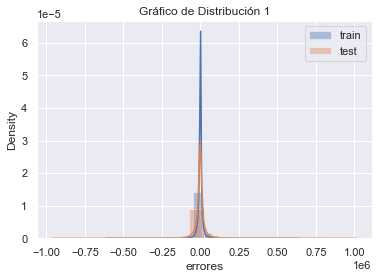

In [248]:
#errores Random Forest
sns.distplot(y_trainf - y_train_predf2, bins = 20, label = 'train')
sns.distplot(y_testf - y_test_predf2, bins = 20, label = 'test')
plt.title('Gráfico de Distribución 1')
plt.xlabel('errores')
plt.legend()

Uno que dice de los errores?
y_train_predf2 = rf_reg.predict(X_trainf)
y_test_predf2 = rf_reg.predict(X_testf)

y_pred_testz = xgbr.predict(X_testz)
y_pred_trainz = xgbr.predict(X_trainz)

C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Camilo\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


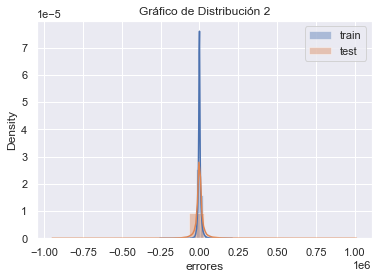

In [249]:
#errores Xgboost
sns.distplot(y_trainz - y_pred_trainz, bins = 20, label = 'train')
sns.distplot(y_testz - y_pred_testz, bins = 20, label = 'test')
plt.title('Gráfico de Distribución 2')
plt.xlabel('errores')
plt.legend()

**Parte C Distribución de Errores**

Como podemos observar en las dos gráficas de las distribuciones 1 y 2 de los errores, mo se distribuyen de manera normal. Esto es importante porque la distribución normal permite estimar intervalos de confianza y se puede validar la predicción.
Por lo tanto, a pesar de que el modelo XGboost y Random Forest en las métricas de R cuadrado y errores cuadraticos medios, fueron uno de los mejores modelos probados en este flujo de trabajo. La distribución de sus errores no permiter estimar con claridad un intervalo de confianza y validar la predicción.

## Anexo: Revisando otros modelos por curiosidad

In [250]:
from sklearn.model_selection import train_test_split
X = X1

y = y1 
X_trainp2, X_testp2, y_trainp2, y_testp2 = train_test_split( X1, y1, test_size=0.25, random_state=42)

In [251]:
X

,0,1
0,-0.628975,-0.319448
1,-0.732765,-0.405653
2,0.855910,1.199674
3,-0.745383,-0.427539
4,-1.308503,-0.949345
...,...,...
75751,-0.035292,-0.485911
75752,0.410553,-0.003026
75753,0.424420,-0.011267
75754,-0.035292,-0.485911


In [252]:
y

117235    109000.0
30790     132411.0
17341     330000.0
95791      99000.0
40463      40000.0
            ...   
79440     194000.0
17049     259000.0
17048     210000.0
79444     198000.0
72742      79990.0
Name: price, Length: 75756, dtype: float64

In [253]:
X_trainp2.shape, X_testp2.shape, y_trainp2.shape, y_testp2.shape

((56817, 2), (18939, 2), (56817,), (18939,))

In [254]:
from sklearn.preprocessing import PolynomialFeatures

In [255]:
poly = PolynomialFeatures(2) #Degree: hiperparametro
X_train_new2 = poly.fit_transform(X_trainp2)
X_test_new2 = poly.fit_transform(X_testp2)

In [256]:
reg_3 = LinearRegression()
reg_3.fit(X_train_new2, y_trainp2)
print(reg_3.coef_, reg_3.intercept_)
y_train_pred_2p = reg_3.predict(X_train_new2)
y_test_pred_2p = reg_3.predict(X_test_new2)

[     0.         153921.04163785 -14008.46021147 -12687.51171938
  19452.76102204 -16596.07831176] 230171.07710666317


In [257]:
print('R2 para Testeo:', r2_score(y_testp2,y_test_pred_2p))
print('R2 para Train:', r2_score(y_trainp2,y_train_pred_2p))

R2 para Testeo: 0.5576964074852003
R2 para Train: 0.551199161418365


In [258]:
 ### CALCULAMOS EL ERROR
rmse_train = np.sqrt(mean_squared_error(y_trainp2, y_train_pred_2p))
rmse_test = np.sqrt(mean_squared_error(y_testp2, y_test_pred_2p))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 105543.12836336005
Raíz del error cuadrático medio en Test: 106685.92091737512


In [259]:
Score = cross_val_score(reg_3, X_trainp2, y_trainp2, cv=5)
print('Mean cross-validation score: %.2f'% Score.mean())

Mean cross-validation score: 0.50


Text(0, 0.5, 'prediccion')

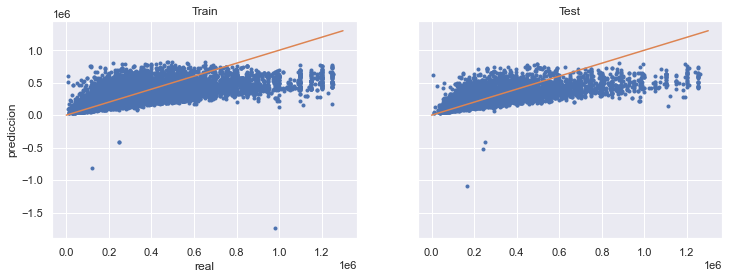

In [260]:
%matplotlib inline
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))
ax[0].plot(y_trainp2, y_train_pred_2p, '.')
ax[1].plot(y_testp2, y_test_pred_2p, '.')
ax[0].plot((0, 1300000), (0, 1300000),'-')
ax[1].plot((0, 1300000), (0, 1300000),'-')

ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_xlabel('real')
ax[0].set_ylabel('prediccion')

In [261]:
from sklearn.linear_model import Ridge, Lasso
reg_R = Ridge(alpha = 0.1)
reg_R.fit(X_train_new2, y_trainp2)
print(f'Pendiente : {reg_R.coef_}')
print(f'Ordenada : {reg_R.intercept_}')

Pendiente : [     0.         153913.92227249 -14001.25550773 -12656.68639043
  19394.42888112 -16568.86336266]
Ordenada : 230169.89996274427
